In [32]:
#!./bin/python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from src.world import World, Simulation

s = Simulation()

num_simulations = 3

simulations = []

for i in range(num_simulations):
    simulations.append(Simulation())


In [33]:
nights_df = pd.DataFrame(s.nightly_stats)

In [34]:
nights_df.head()

,nightly_lick_counter,lick_counter,population_wuzzle,dead_wuzzle,live_wuzzle,total_hunger_wuzzle,population_candy,dead_candy,live_candy,total_hunger_candy
0,0,0,100,0,100,0.00,100,0,100,0.00
1,291,291,100,0,100,25.00,100,0,100,25.00
2,328,619,100,0,100,28.75,100,0,100,28.25
3,315,934,100,8,92,25.00,100,2,98,28.25
4,305,1239,100,11,89,24.25,100,10,90,26.00


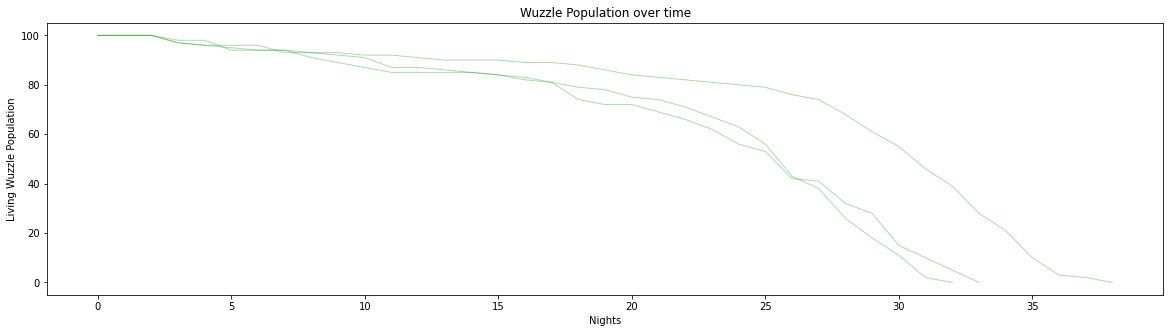

In [36]:
plt.figure(figsize=(20, 5))

for sim in simulations:
    nights_df = pd.DataFrame(sim.nightly_stats)
    plt.plot(nights_df['live_wuzzle'], color='green', alpha=.3, linewidth=1)
plt.ylabel('Living Wuzzle Population')
plt.xlabel('Nights')
plt.title('Wuzzle Population over time')

plt.show()


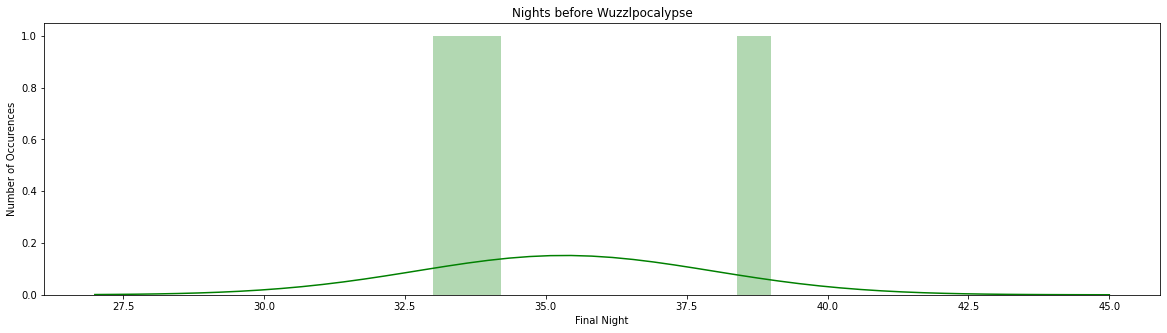

In [37]:
from scipy.stats import norm
max_nights = []

for sim in simulations:
    nights_df = pd.DataFrame(sim.nightly_stats)
    max_nights.append(len(nights_df))

max_nights = np.array(max_nights)

dist = norm(loc=max_nights.mean(), scale=max_nights.std())

spread = max_nights.max() - max_nights.min()
support = np.linspace(max_nights.min() - spread, max_nights.max() + spread, 50)

plt.figure(figsize=(20, 5))

plt.plot(support, dist.pdf(support), color='green')
plt.hist(max_nights, color='green', alpha=.3, linewidth=1)
plt.ylabel('Number of Occurences')
plt.xlabel('Final Night')
plt.title('Nights before Wuzzlpocalypse')

plt.show()


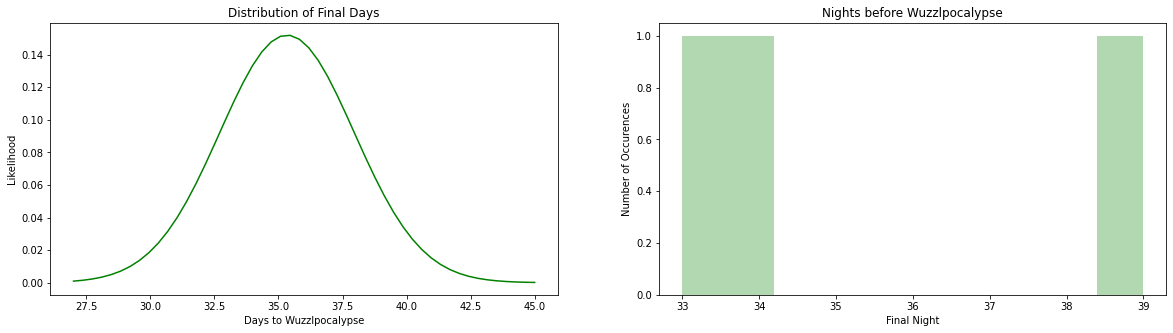

In [38]:
# using tuple unpacking for multiple Axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

max_nights = []

for sim in simulations:
    nights_df = pd.DataFrame(sim.nightly_stats)
    max_nights.append(len(nights_df))

max_nights = np.array(max_nights)

dist = norm(loc=max_nights.mean(), scale=max_nights.std())

spread = max_nights.max() - max_nights.min()
support = np.linspace(max_nights.min() - spread, max_nights.max() + spread, 50)

ax1.plot(support, dist.pdf(support), color='green')
ax1.set_ylabel('Likelihood')
ax1.set_xlabel('Days to Wuzzlpocalypse')
ax1.set_title('Distribution of Final Days')

ax2.hist(max_nights, color='green', alpha=.3, linewidth=1)
ax2.set_ylabel('Number of Occurences')
ax2.set_xlabel('Final Night')
ax2.set_title('Nights before Wuzzlpocalypse')

plt.show()

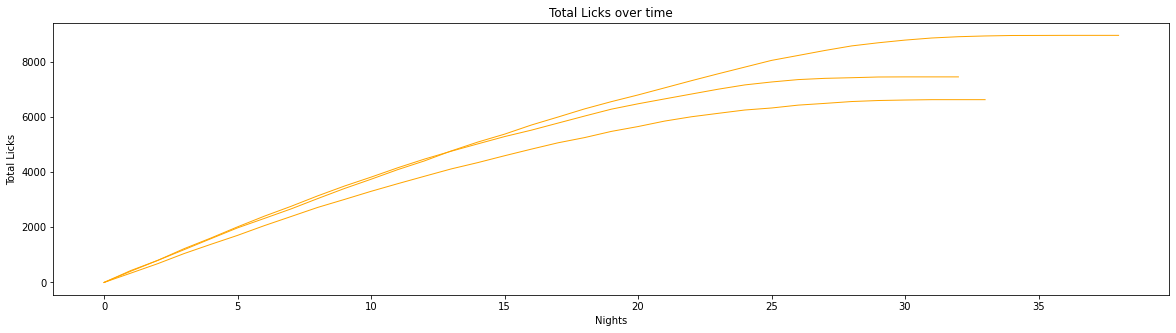

In [39]:
plt.figure(figsize=(20, 5))

for sim in simulations:
    nights_df = pd.DataFrame(sim.nightly_stats)
    plt.plot(nights_df['lick_counter'], color='orange', alpha=1, linewidth=1)
plt.ylabel('Total Licks')
plt.xlabel('Nights')
plt.title('Total Licks over time')

plt.show();

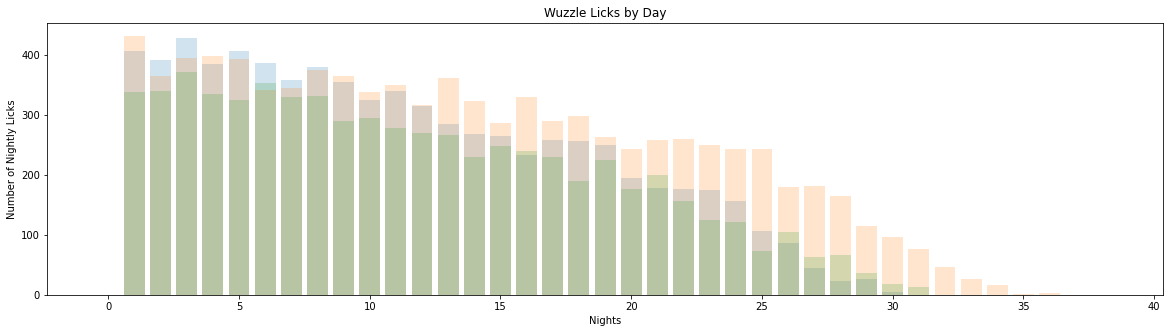

In [41]:
plt.figure(figsize=(20, 5))

for sim in simulations:
    nights_df = pd.DataFrame(sim.nightly_stats)
    support = list(range(len(nights_df)))
    
    plt.bar(height=nights_df['nightly_lick_counter'], x=support, alpha=.2)

plt.ylabel('Number of Nightly Licks')
plt.xlabel('Nights')
plt.title('Wuzzle Licks by Day')

plt.show();